In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import os
import torch

## Rotation Magnitude 

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1654749167.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


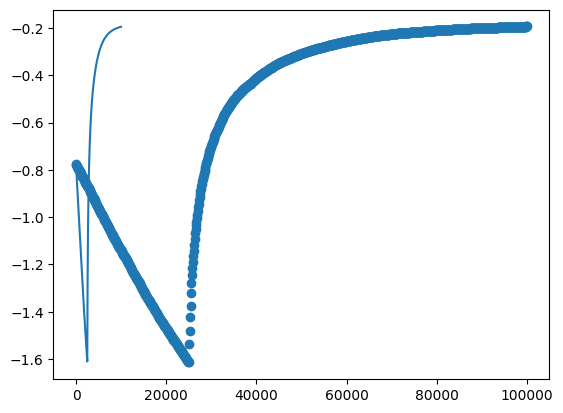

In [36]:

result_folder_path = "../../cata/run/results/rotation_magnitude/"
fig = plt.figure()
ode_df = pd.read_csv(os.path.join(result_folder_path, "1", "single", "data_logger_ode.csv"))
network_df = pd.read_csv(os.path.join(result_folder_path, "1", "single", "data_logger_network.csv"))
ode_0 = np.array(ode_df.log_generalisation_error_0)
ode_1 = np.array(ode_df.log_generalisation_error_1)
network_0 = np.array(network_df.log_generalisation_error_0)
network_1 = np.array(network_df.log_generalisation_error_1)
plt.plot(range(len(ode_0)), ode_0)
plt.scatter(range(len(network_0)), network_0)
fig.show()

In [4]:
results_folder = "../../cata/run/results/rotation_magnitude/"

In [29]:
forgets = {}
transfers = {}

error_0 = {}
error_1 = {}

swich_step = 2500

for i,m in enumerate([1,1.57,2.5,3.14159]):
    i = i / 100
    i_df = pd.read_csv(os.path.join(results_folder, f"{m}", "single/data_logger_ode.csv"))
    switch_error_0 = np.array(i_df["log_generalisation_error_0"])[swich_step]
    switch_error_1 = np.array(i_df["log_generalisation_error_1"])[swich_step]
    final_error_0 = np.array(i_df["log_generalisation_error_0"])[-1]
    final_error_1 = np.array(i_df["log_generalisation_error_1"])[-1]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0[i] = np.array(i_df["log_generalisation_error_0"])
    error_1[i] = np.array(i_df["log_generalisation_error_1"])
    
error_0_ = {}
error_1_ = {}
    
for i,m in enumerate([1,1.57,2.5,3.14159]):
    i = i / 100
    i_df = pd.read_csv(os.path.join(results_folder, f"{m}", "single/data_logger_network.csv"))
    switch_error_0 = np.array(i_df["log_generalisation_error_0"])[swich_step]
    switch_error_1 = np.array(i_df["log_generalisation_error_1"])[swich_step]
    final_error_0 = np.array(i_df["log_generalisation_error_0"])[-1]
    final_error_1 = np.array(i_df["log_generalisation_error_1"])[-1]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0_[i] = np.array(i_df["log_generalisation_error_0"])
    error_1_[i] = np.array(i_df["log_generalisation_error_1"])

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1666141593.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1666141593.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


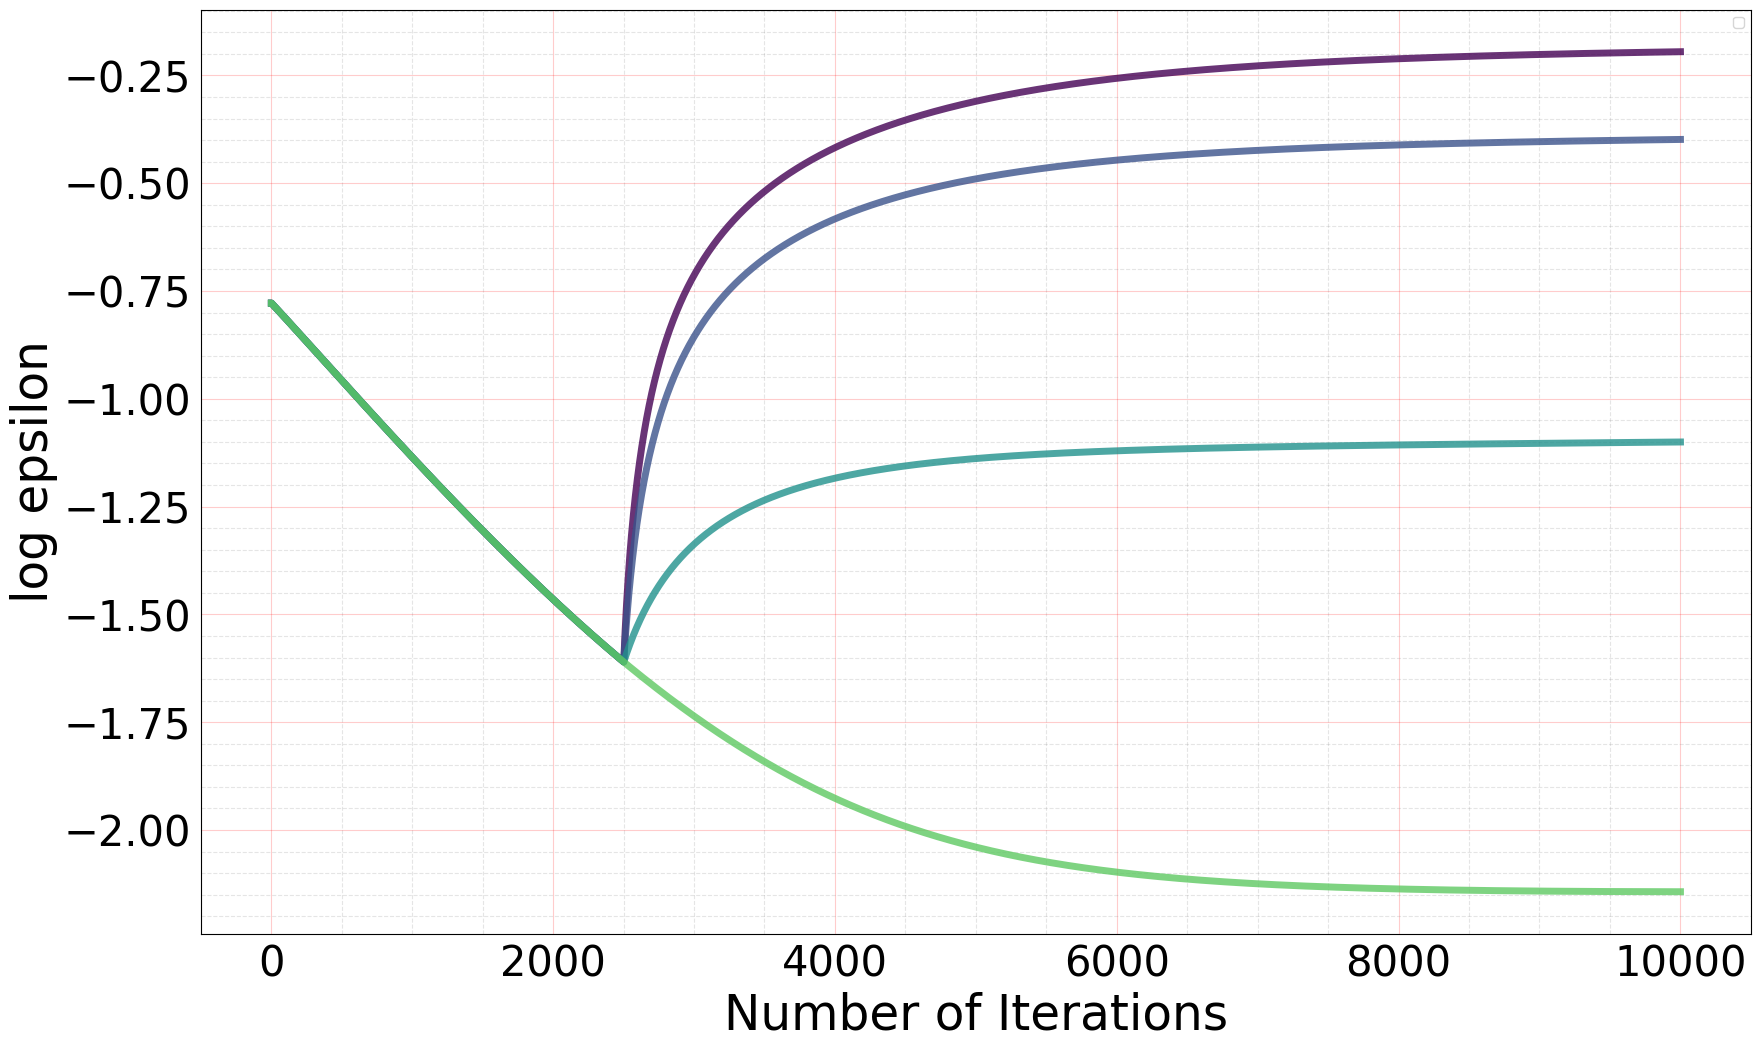

In [53]:
color_map = cm.get_cmap("viridis")

N = 30000
M = 100

# switch = 10000
switch = 2500

fig = plt.figure(figsize=(20, 12))

# plt.plot(np.arange(len(error_0[0.0][:switch])), error_0[0.0][:switch], color='k', alpha=0.4, linewidth=3)
for i, (overlap, err) in enumerate(error_0.items()):
#     if i in [20]:
    plt.plot(np.arange(len(err[:N])), err[:N], color=color_map(i/len(error_0)), alpha=0.8, linewidth=5)
    
# for i, (overlap, err) in enumerate(error_0_.items()):
#     if i in [1, 100]:
#         plt.scatter(np.arange(switch, len(err[:N]))[0::M], err[switch:N][0::M], color=color_map(i/len(error_0_)), s=100, marker="+")

plt.legend()
# plt.xlim(0, N)
# plt.ylim(-4.5, -0.5)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True,
            labelsize = 30
    
        ) 
plt.xlabel("Number of Iterations", fontsize=35)
plt.ylabel("log epsilon", fontsize=35)
fig.show()
# fig.savefig("long_time_forgetting_no_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1787860890.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1787860890.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


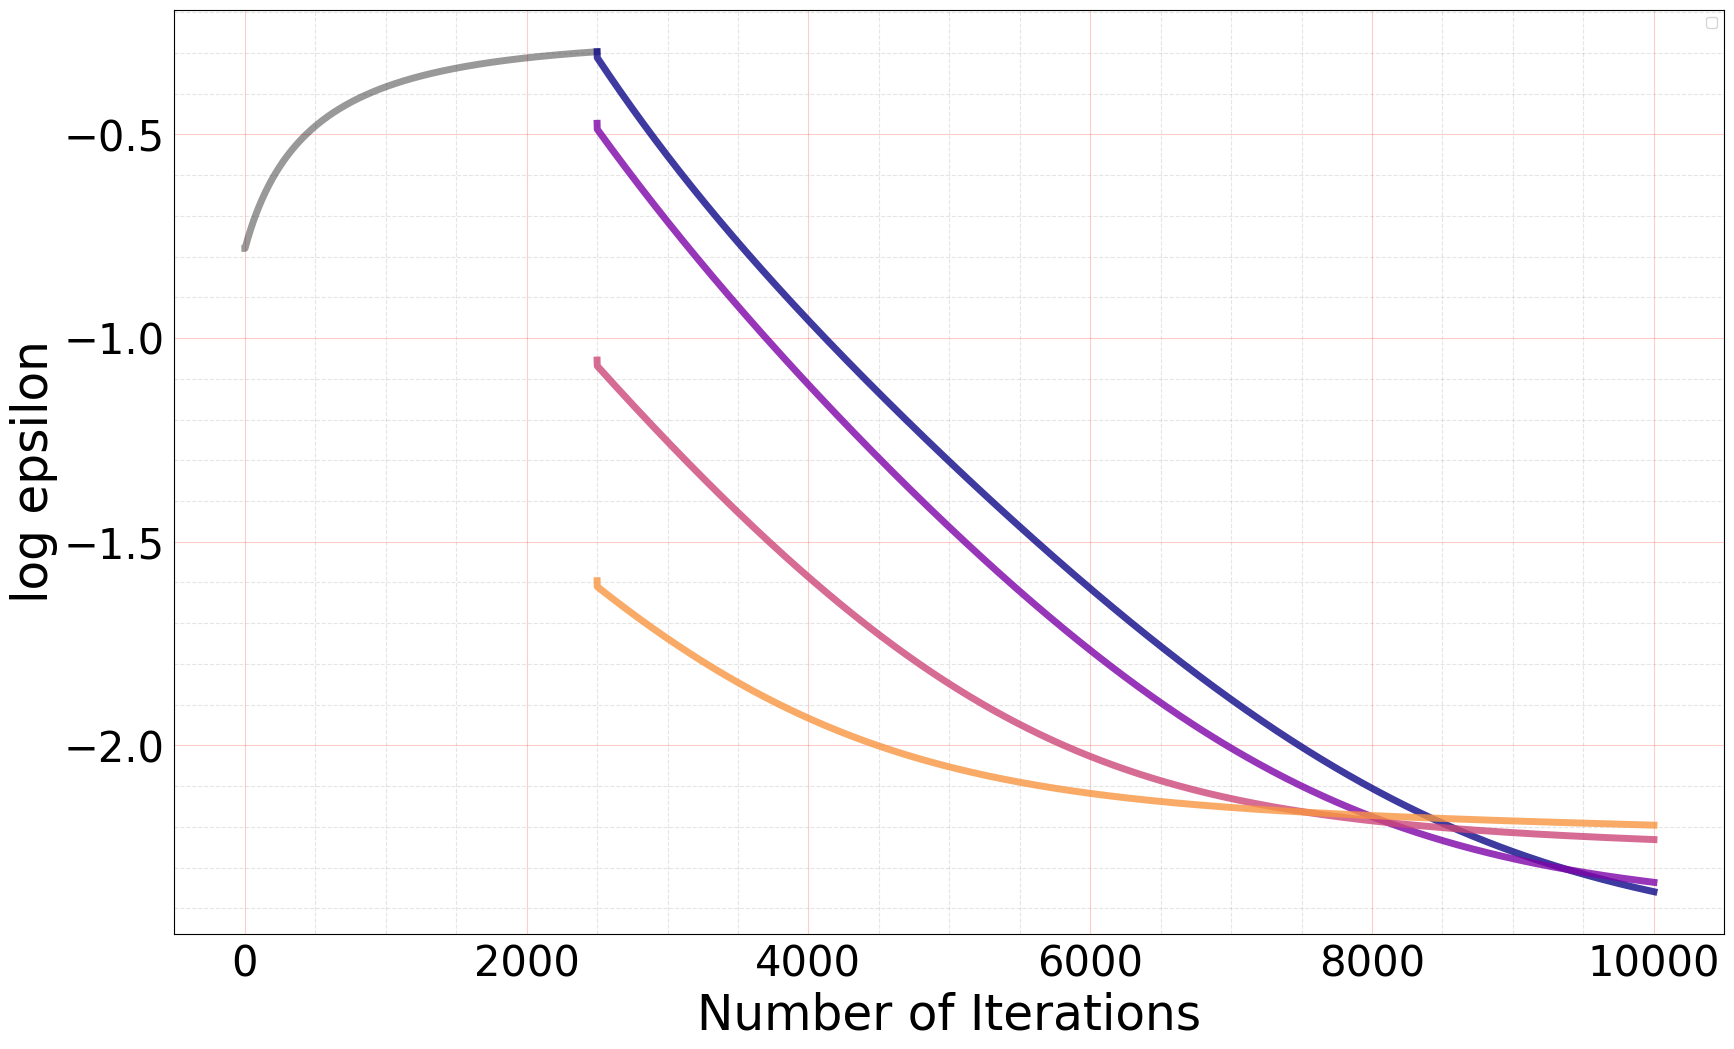

In [44]:
color_map = cm.get_cmap("plasma")

N = 30000
M = 100
# switch = 10000
switch = 2500
factor = 1

fig = plt.figure(figsize=(20, 12))

plt.plot(np.arange(len(error_1[0.0][:switch])), error_1[0.0][:switch], color='k', alpha=0.4, linewidth=5)
for i, (overlap, err) in enumerate(error_1.items()):
#     if i in [0, 1]:
    plt.plot(np.arange(switch, len(err[:N])), err[switch:N], color=color_map(i/len(error_1)), alpha=0.8, linewidth=5)
    
# for i, (overlap, err) in enumerate(error_1.items()):
#     if i in [0, 1]:
#         plt.scatter(np.arange(switch//factor, len(error_1_[overlap][:N//factor]))[0::M], error_1_[overlap][switch//factor:N//factor][0::M], color=color_map(i/len(error_1_)), s=100, marker="+")

plt.legend()
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=True, # labels along the bottom edge are off
            left=False,
            labelleft=True,
            labelsize = 30
    
        ) 
plt.xlabel("Number of Iterations", fontsize=35)
plt.ylabel("log epsilon", fontsize=35)
fig.show()
# fig.savefig("long_time_transfer_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [50]:
color_map = cm.get_cmap("viridis")

def cross_section_plot(interval):
    forgettings = {}
    fig = plt.figure()
    for i, (overlap, err) in enumerate(error_0.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), s=100)
    for i, (overlap, err) in enumerate(error_0_.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), marker='+')
    plt.minorticks_on()
    plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
    plt.tick_params(
                axis='both',         # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False, # labels along the bottom edge are off
                left=False,
                labelleft=False
            )
    # plt.xlim(0, 1)
#     plt.ylim(0, 1)
    fig.show()
    # fig.savefig(f"forgetting_cross_section_{interval - switch}_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\4050931660.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")


C:\Users\USER\AppData\Local\Temp\ipykernel_14488\4050931660.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


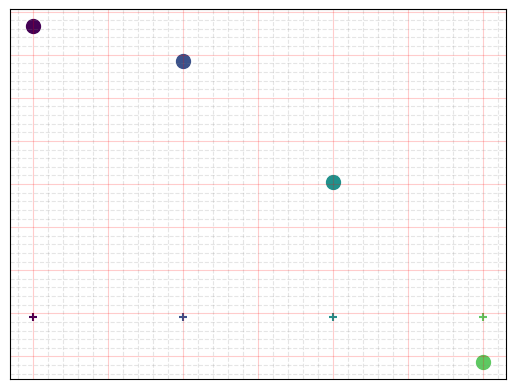

In [51]:
cross_section_plot(10000)

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\3474536122.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


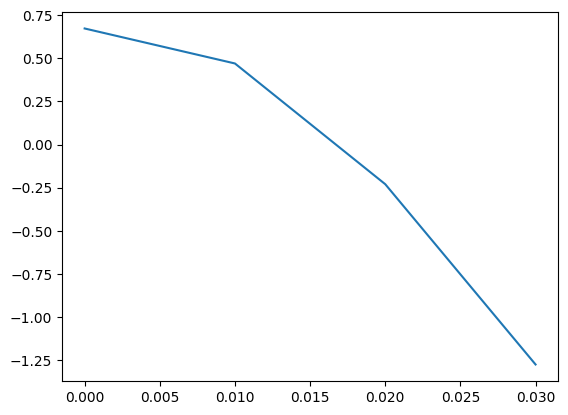

In [47]:
fig = plt.figure()
plt.plot(forgets.keys(), forgets.values())
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14488\1259017235.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


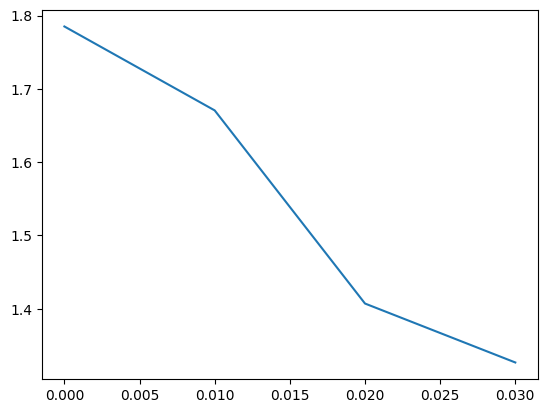

In [48]:
fig = plt.figure()
plt.plot(transfers.keys(), transfers.values())
fig.show()

## Feature copy percentage

In [49]:
# result_folder_path = "../run/results/2020-11-27-18-39-31/"
result_folder_path = "../../cata/run/results/diff_copy_percentage/"

In [3]:
# v_0_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_0.0", str(i), "data_logger_ode.csv")) for i in range(4)]
# v_05_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_0.5", str(i), "data_logger_ode.csv")) for i in range(4)]
# v_1_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_1.0", str(i), "data_logger_ode.csv")) for i in range(4)]
v_0_dfs = pd.read_csv(os.path.join(result_folder_path, "0", "single/data_logger_ode.csv")) 
v_05_dfs =pd.read_csv(os.path.join(result_folder_path, "50", "single/data_logger_ode.csv")) 
v_1_dfs = pd.read_csv(os.path.join(result_folder_path, "100", "single/data_logger_ode.csv"))

In [5]:
# switch_errors_1_v_0 = [df.generalisation_error_1[4999] for df in v_0_dfs]
# switch_errors_1_v_05 = [df.generalisation_error_1[4999] for df in v_05_dfs]
# switch_errors_1_v_1 = [df.generalisation_error_1[4999] for df in v_1_dfs]\

switch_errors_1_v_0 = v_0_dfs.generalisation_error_1[4999] 
switch_errors_1_v_05 = v_05_dfs.generalisation_error_1[4999]
switch_errors_1_v_1 = v_1_dfs.generalisation_error_1[4999] 

In [7]:
len( v_0_dfs.generalisation_error_1)

10002

In [8]:
# final_errors_1_v_0 = [df.generalisation_error_1[14999] for df in v_0_dfs]
# final_errors_1_v_05 = [df.generalisation_error_1[14999] for df in v_05_dfs]
# final_errors_1_v_1 = [df.generalisation_error_1[14999] for df in v_1_dfs]

final_errors_1_v_0 = v_0_dfs.generalisation_error_1[10000]
final_errors_1_v_05 = v_05_dfs.generalisation_error_1[10000]
final_errors_1_v_1 = v_1_dfs.generalisation_error_1[10000] 

In [9]:
np.mean(switch_errors_1_v_0)

0.0609821491556714

In [10]:
np.mean(switch_errors_1_v_05)

0.0609821491556714

In [11]:
np.mean(switch_errors_1_v_1)

0.0609821491556714

In [12]:
switch_errors_1_v_0

0.0609821491556714

In [13]:
switch_errors_1_v_05

0.0609821491556714

In [14]:
np.mean(final_errors_1_v_0)

0.0044775186667361

In [15]:
np.mean(final_errors_1_v_05)

0.0044775186667361

In [16]:
np.mean(final_errors_1_v_1)

0.0044775186667361

In [5]:
result_folder_path = "../run/results/multi_seed_feature_sim_three_points/"

In [6]:
v_0_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_0.0", str(i), "ode_log.csv")) for i in range(4)]
v_05_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_0.5", str(i), "ode_log.csv")) for i in range(4)]
v_1_dfs = [pd.read_csv(os.path.join(result_folder_path, "v_1.0", str(i), "ode_log.csv")) for i in range(4)]

In [9]:
v_0_dfs[0].generalisation_error_0[14999] - v_0_dfs[0].generalisation_error_0[4999]

0.0009497362628354544

In [10]:
v_0_dfs[1].generalisation_error_0[14999] - v_0_dfs[1].generalisation_error_0[4999]

0.005821384159718396

In [15]:
v_0_dfs[2].generalisation_error_0[14999] - v_0_dfs[2].generalisation_error_0[4999]

0.004139326366331297

In [16]:
v_0_dfs[3].generalisation_error_0[14999] - v_0_dfs[3].generalisation_error_0[4999]

0.04403410931718085

In [11]:
v_1_dfs[0].generalisation_error_0[14999] - v_1_dfs[0].generalisation_error_0[4999]

0.0010370710904580305

In [12]:
v_1_dfs[1].generalisation_error_0[14999] - v_1_dfs[1].generalisation_error_0[4999]

0.0026176185810188185

In [13]:
v_1_dfs[2].generalisation_error_0[14999] - v_1_dfs[2].generalisation_error_0[4999]

0.0022384232171990255

In [14]:
v_1_dfs[3].generalisation_error_0[14999] - v_1_dfs[3].generalisation_error_0[4999]

0.003784054451908797

In [17]:
def forgetting_rate(df, switch_step):
    diffs = [df.generalisation_error_0[switch_step + i + 1] - df.generalisation_error_0[switch_step + i] for i in range(100)]
    return np.mean(diffs)

In [19]:
# np.mean([forgetting_rate(v, 4999) for v in v_0_dfs])
forgetting_rate(v_0_dfs, 4999)

0.00010573720671113728

In [20]:
forgetting_rate(v_05_dfs, 4999)

0.00010573720671113728

In [21]:
forgetting_rate(v_1_dfs, 4999)

0.00010573720671113728

In [37]:
forgets = {}
transfers = {}

error_0 = {}
error_1 = {}


for i, i_df in enumerate([v_0_dfs,v_05_dfs,v_1_dfs]):
    # i_df = pd.read_csv(os.path.join(results_folder, f"v_{i}", "0", "ode_log.csv"))
    switch_error_0 = i_df["log_generalisation_error_0"].iloc[2500]
    switch_error_1 = i_df["log_generalisation_error_1"].iloc[2500]
    final_error_0 = i_df["log_generalisation_error_0"].iloc[10000]
    final_error_1 = i_df["log_generalisation_error_1"].iloc[10000]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0[i] = np.array(i_df["log_generalisation_error_0"])
    error_1[i] = np.array(i_df["log_generalisation_error_1"])

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\186379217.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\186379217.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


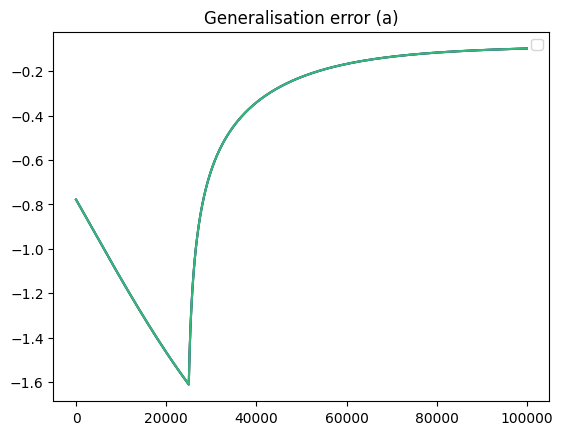

In [38]:
color_map = cm.get_cmap("viridis")

fig = plt.figure()
for i, (overlap, err) in enumerate(error_0.items()):
    plt.plot(10*np.arange(len(err)), err, color=color_map(i/len(error_0)))
plt.legend()
plt.title("Generalisation error (a)")
fig.show()
# fig.savefig("long_time.pdf", dpi=100)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2995376421.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2995376421.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


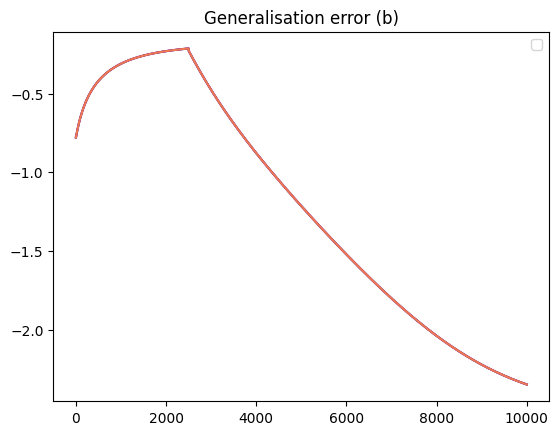

In [39]:
color_map = cm.get_cmap("plasma")

fig = plt.figure()
for i, (overlap, err) in enumerate(error_1.items()):
    plt.plot(range(len(err)), err, color=color_map(i/len(error_1)))
plt.legend()
plt.title("Generalisation error (b)")
fig.show()
# fig.savefig("long_time_transfer.pdf", dpi=100)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\169748334.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


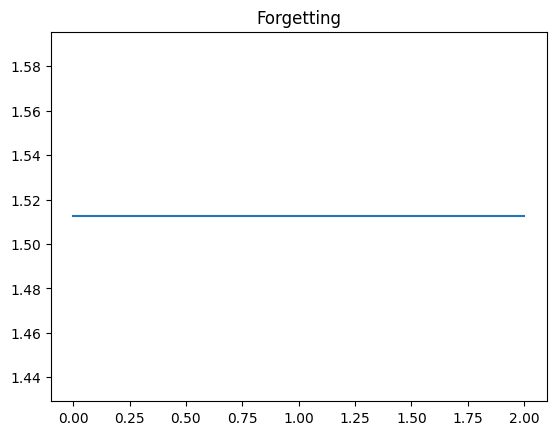

In [43]:
fig = plt.figure()
plt.plot(forgets.keys(), forgets.values())
plt.title("Forgetting")
fig.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1303424435.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


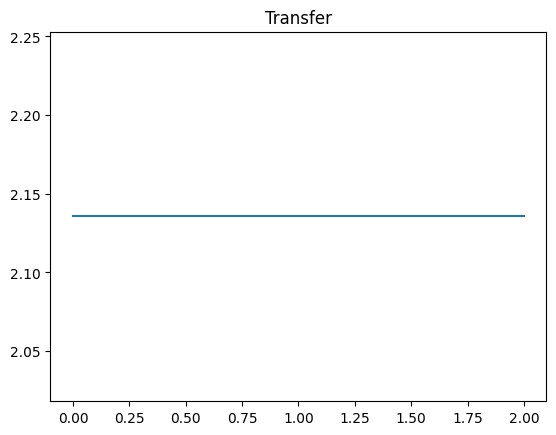

In [42]:
fig = plt.figure()
plt.plot(transfers.keys(), transfers.values())
plt.title("Transfer")
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\3975239718.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\USER\AppData\Local\Temp\ipykernel_14720\3975239718.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


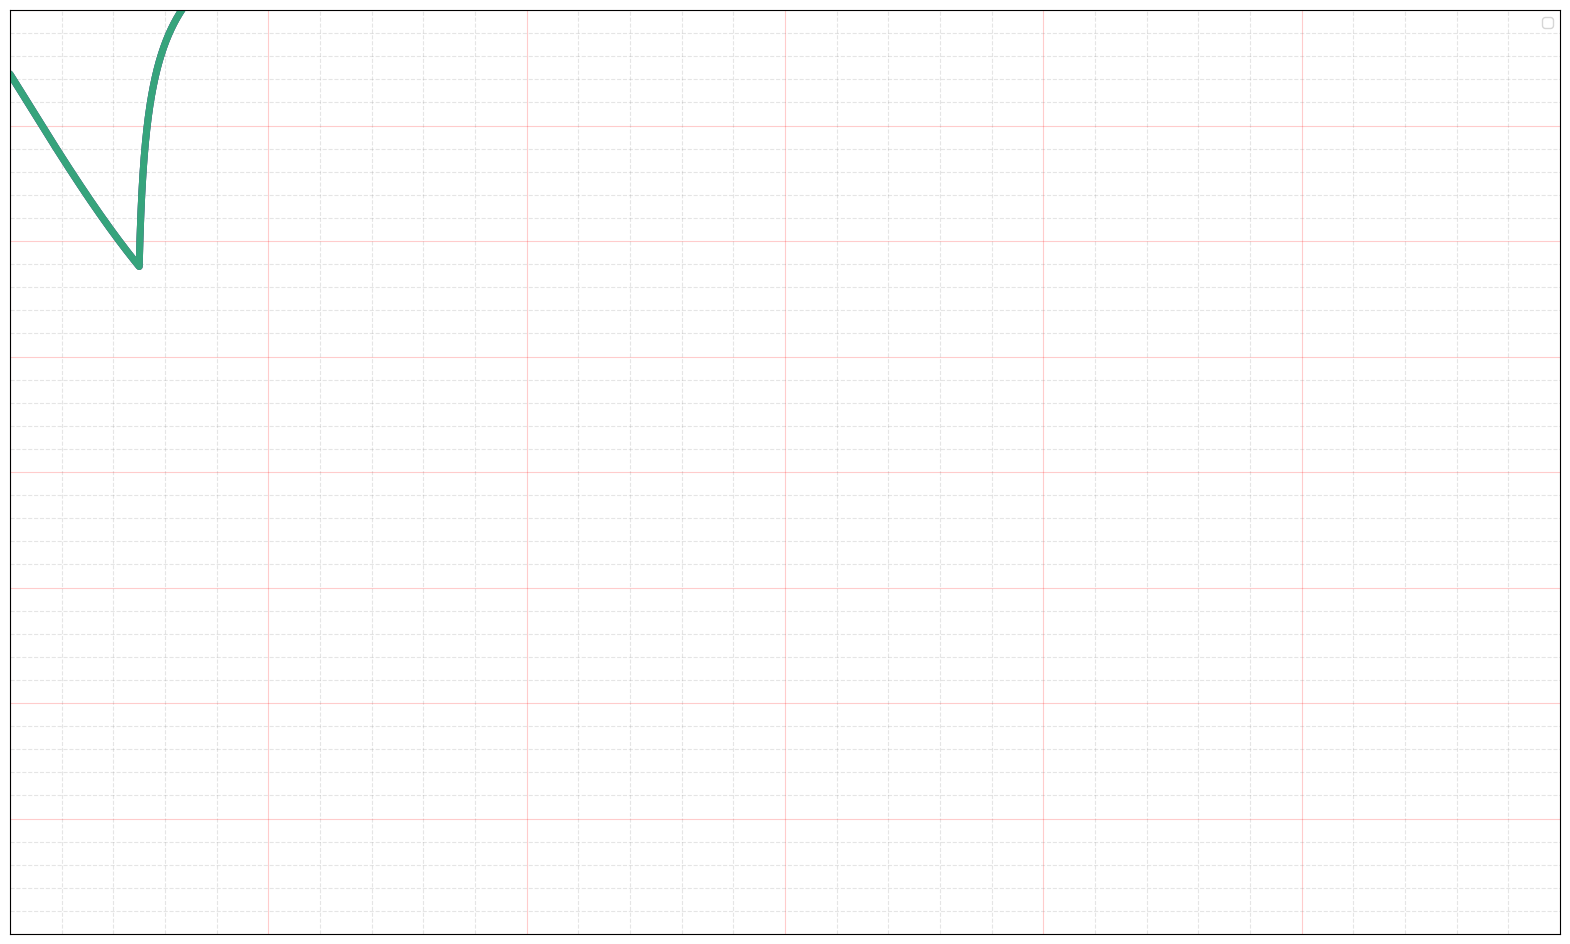

In [46]:
color_map = cm.get_cmap("viridis")

N = 30000
M = 100
switch = 10000

fig = plt.figure(figsize=(20, 12))

# plt.plot(np.arange(len(error_0[0.0][:switch])), error_0[0.0][:switch], color='k', alpha=0.4, linewidth=3)
for i, (overlap, err) in enumerate(error_0.items()):
#     if i in [20]:
    plt.plot(np.arange(len(err[:N])), err[:N], color=color_map(i/len(error_0)), alpha=0.8, linewidth=5)
    
# for i, (overlap, err) in enumerate(error_0_.items()):
#     if i in [1, 100]:
#         plt.scatter(np.arange(switch, len(err[:N]))[0::M], err[switch:N][0::M], color=color_map(i/len(error_0_)), s=100, marker="+")

plt.legend()
plt.xlim(0, N)
plt.ylim(-4.5, -0.5)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
# fig.savefig("long_time_forgetting_no_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\902591799.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\902591799.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


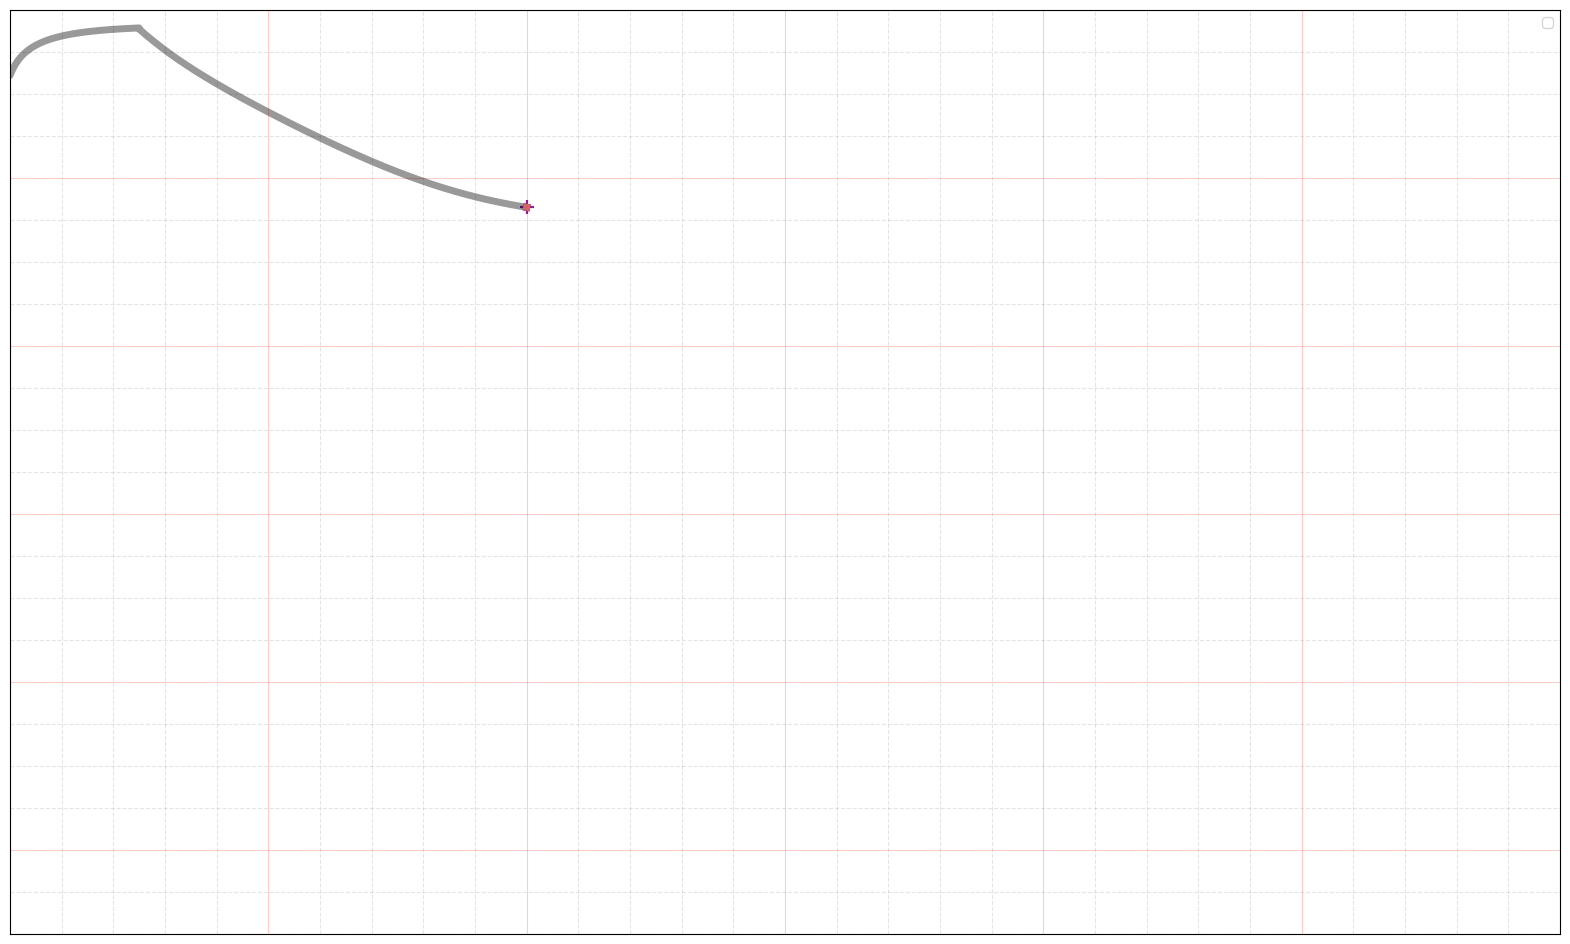

In [48]:
color_map = cm.get_cmap("plasma")

N = 30000
M = 100
switch = 10000
factor = 1

fig = plt.figure(figsize=(20, 12))

plt.plot(np.arange(len(error_1[0.0][:switch])), error_1[0.0][:switch], color='k', alpha=0.4, linewidth=5)
for i, (overlap, err) in enumerate(error_1.items()):
#     if i in [0, 1]:
    plt.plot(np.arange(switch, len(err[:N])), err[switch:N], color=color_map(i/len(error_1)), alpha=0.8, linewidth=5)
    
for i, (overlap, err) in enumerate(error_1.items()):
    if i in [0, 1]:
        plt.scatter(np.arange(switch//factor, len(error_1[overlap][:N//factor]))[0::M], error_1[overlap][switch//factor:N//factor][0::M], color=color_map(i/len(error_1)), s=100, marker="+")

plt.legend()
plt.xlim(0, N)
plt.ylim(-11, 0)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("long_time_transfer_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [49]:
color_map = cm.get_cmap("viridis")

def cross_section_plot(interval):
    forgettings = {}
    fig = plt.figure()
    for i, (overlap, err) in enumerate(error_0.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), s=100)
    for i, (overlap, err) in enumerate(error_0.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), marker='+')
    plt.minorticks_on()
    plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
    plt.tick_params(
                axis='both',         # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False, # labels along the bottom edge are off
                left=False,
                labelleft=False
            )
    plt.xlim(0, 1)
#     plt.ylim(0, 1)
    fig.show()
    fig.savefig(f"forgetting_cross_section_{interval - switch}_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1247394447.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1247394447.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


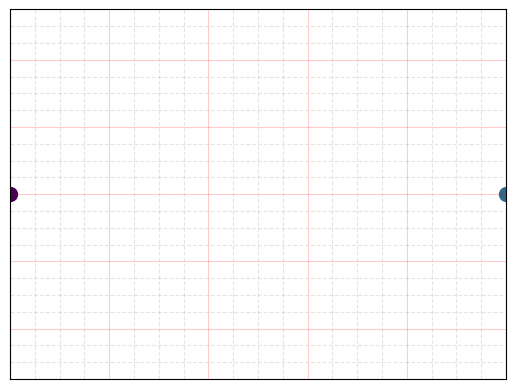

In [56]:
cross_section_plot(10000)

In [59]:
v_0_dfs = pd.read_csv(os.path.join(result_folder_path, "0", "single/data_logger_ode.csv")) 
v_05_dfs =pd.read_csv(os.path.join(result_folder_path, "50", "single/data_logger_ode.csv")) 
v_1_dfs = pd.read_csv(os.path.join(result_folder_path, "100", "single/data_logger_ode.csv"))

n_0_dfs = pd.read_csv(os.path.join(result_folder_path, "0", "single/data_logger_network.csv")) 
n_05_dfs =pd.read_csv(os.path.join(result_folder_path, "50", "single/data_logger_network.csv")) 
n_1_dfs = pd.read_csv(os.path.join(result_folder_path, "100", "single/data_logger_network.csv"))

In [61]:
forgets = {}
transfers = {}

error_0 = {}
error_1 = {}

results_folder = "../../cata/run/results/diff_copy_percentage/"
for i, i_df in enumerate([v_0_dfs,v_05_dfs,v_1_dfs]):
    i = i / 100
    # i_df = pd.read_csv(os.path.join(results_folder, f"v_{i}", "0", "ode_log.csv"))
    switch_error_0 = np.array(i_df["log_generalisation_error_0"])[5000]
    switch_error_1 = np.array(i_df["log_generalisation_error_1"])[5000]
    final_error_0 = np.array(i_df["log_generalisation_error_0"])[-1]
    final_error_1 = np.array(i_df["log_generalisation_error_1"])[-1]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0[i] = np.array(i_df["log_generalisation_error_0"])
    error_1[i] = np.array(i_df["log_generalisation_error_1"])
    
error_0_ = {}
error_1_ = {}
    
for i, i_df in enumerate([n_0_dfs,n_05_dfs,n_1_dfs]):
    i = i / 100
    # i_df = pd.read_csv(os.path.join(results_folder, f"v_{i}", "0", "network_log.csv"))
    switch_error_0 = np.array(i_df["log_generalisation_error_0"])[5000]
    switch_error_1 = np.array(i_df["log_generalisation_error_1"])[5000]
    final_error_0 = np.array(i_df["log_generalisation_error_0"])[-1]
    final_error_1 = np.array(i_df["log_generalisation_error_1"])[-1]
    final_forgetting = final_error_0 - switch_error_0
    final_transfer = switch_error_1 - final_error_1
    forgets[i] = final_forgetting
    transfers[i] = final_transfer
    error_0_[i] = np.array(i_df["log_generalisation_error_0"])
    error_1_[i] = np.array(i_df["log_generalisation_error_1"])

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1740881277.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


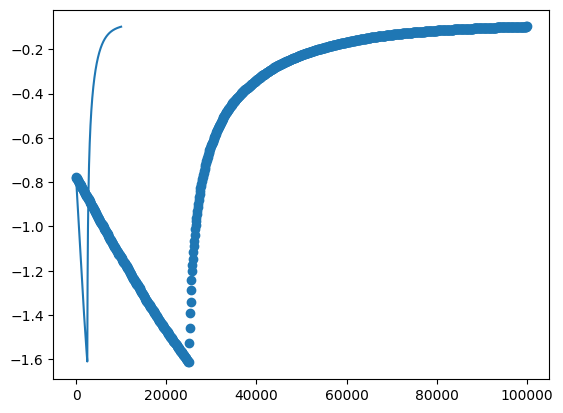

In [62]:

result_folder_path = "../../cata/run/results/diff_copy_percentage/"
fig = plt.figure()
ode_df = pd.read_csv(os.path.join(result_folder_path, "0", "single", "data_logger_ode.csv"))
network_df = pd.read_csv(os.path.join(result_folder_path, "0", "single", "data_logger_network.csv"))
ode_0 = np.array(ode_df.log_generalisation_error_0)
ode_1 = np.array(ode_df.log_generalisation_error_1)
network_0 = np.array(network_df.log_generalisation_error_0)
network_1 = np.array(network_df.log_generalisation_error_1)
plt.plot(range(len(ode_0)), ode_0)
plt.scatter(range(len(network_0)), network_0)
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2207999917.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


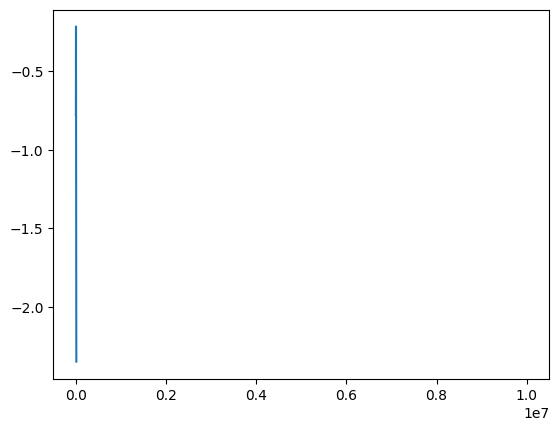

In [58]:
fig = plt.figure()

plt.plot(np.arange(len(ode_df.log_generalisation_error_1)), np.array(ode_df.log_generalisation_error_1))
plt.plot(100 * np.arange(len(network_df.log_generalisation_error_1)), np.array(network_df.log_generalisation_error_1), linestyle="dashed")
fig.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1735802772.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\USER\AppData\Local\Temp\ipykernel_14720\1735802772.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


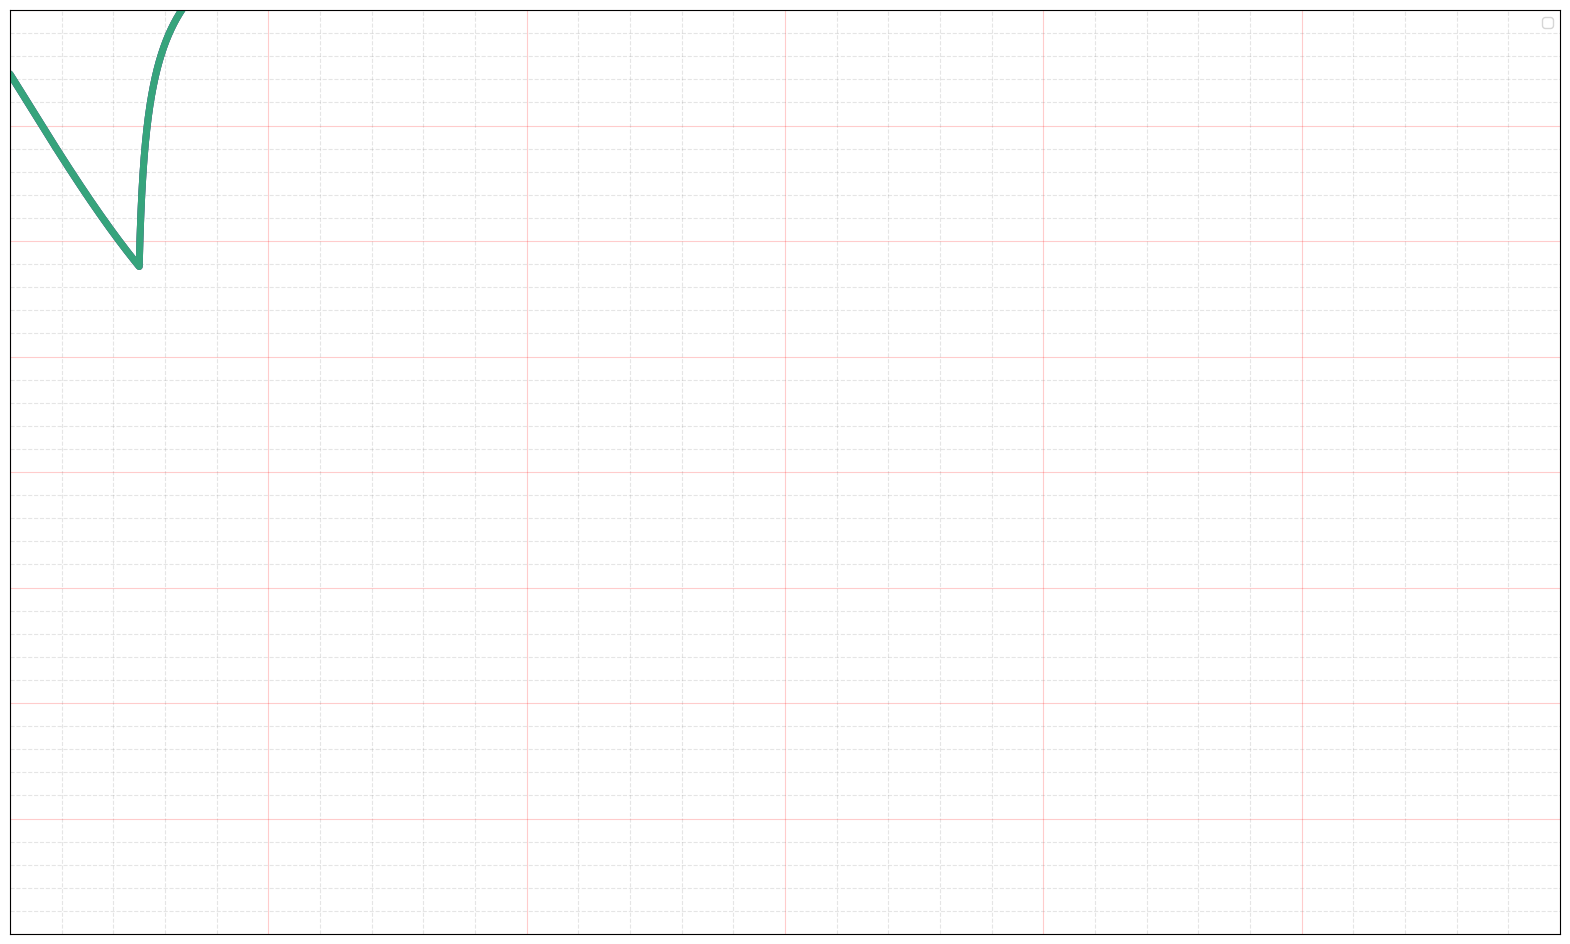

In [64]:
color_map = cm.get_cmap("viridis")

N = 30000
M = 100
switch = 10000

fig = plt.figure(figsize=(20, 12))

# plt.plot(np.arange(len(error_0[0.0][:switch])), error_0[0.0][:switch], color='k', alpha=0.4, linewidth=3)
for i, (overlap, err) in enumerate(error_0.items()):
#     if i in [20]:
    plt.plot(np.arange(len(err[:N])), err[:N], color=color_map(i/len(error_0)), alpha=0.8, linewidth=5)
    
# for i, (overlap, err) in enumerate(error_0_.items()):
#     if i in [1, 100]:
#         plt.scatter(np.arange(switch, len(err[:N]))[0::M], err[switch:N][0::M], color=color_map(i/len(error_0_)), s=100, marker="+")

plt.legend()
plt.xlim(0, N)
plt.ylim(-4.5, -0.5)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("long_time_forgetting_no_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\346027228.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("plasma")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\USER\AppData\Local\Temp\ipykernel_14720\346027228.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


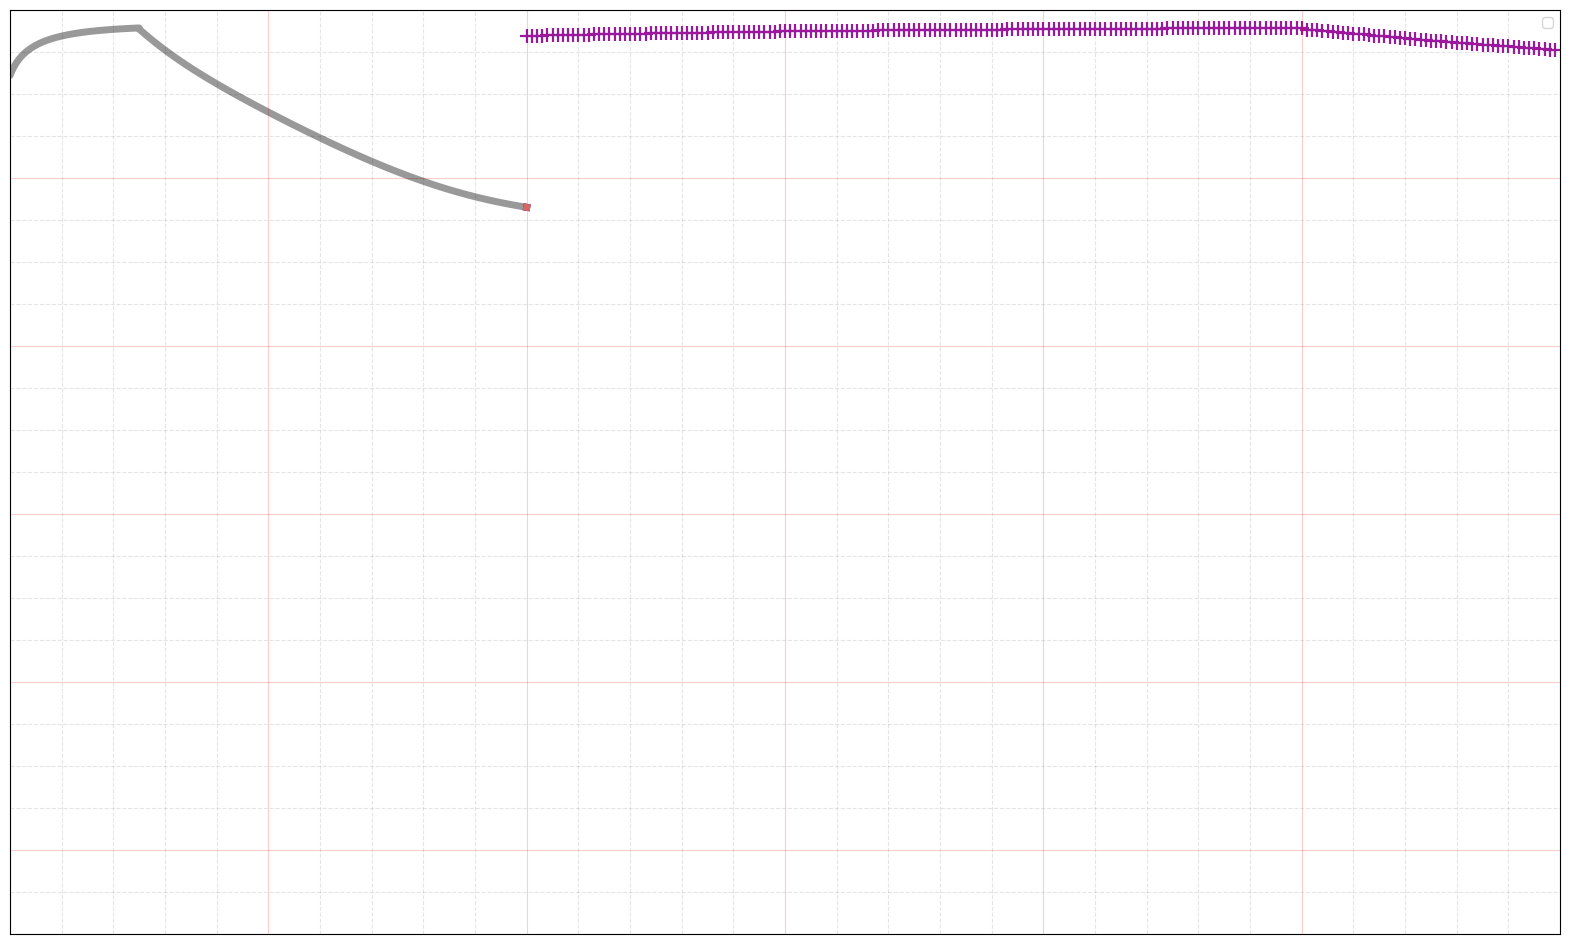

In [65]:
color_map = cm.get_cmap("plasma")

N = 30000
M = 100
switch = 10000
factor = 1

fig = plt.figure(figsize=(20, 12))

plt.plot(np.arange(len(error_1[0.0][:switch])), error_1[0.0][:switch], color='k', alpha=0.4, linewidth=5)
for i, (overlap, err) in enumerate(error_1.items()):
#     if i in [0, 1]:
    plt.plot(np.arange(switch, len(err[:N])), err[switch:N], color=color_map(i/len(error_1)), alpha=0.8, linewidth=5)
    
for i, (overlap, err) in enumerate(error_1.items()):
    if i in [0, 1]:
        plt.scatter(np.arange(switch//factor, len(error_1_[overlap][:N//factor]))[0::M], error_1_[overlap][switch//factor:N//factor][0::M], color=color_map(i/len(error_1_)), s=100, marker="+")

plt.legend()
plt.xlim(0, N)
plt.ylim(-11, 0)
plt.minorticks_on()
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("long_time_transfer_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [67]:
color_map = cm.get_cmap("viridis")

def cross_section_plot(interval):
    forgettings = {}
    fig = plt.figure()
    for i, (overlap, err) in enumerate(error_0.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), s=100)
    for i, (overlap, err) in enumerate(error_0_.items()):
        switch_error = err[switch]
        interval_error = err[interval]
        forgetting = interval_error - switch_error
        forgettings[overlap] = forgetting
        plt.scatter(overlap, forgetting, color=color_map(i/len(error_0)), marker='+')
    plt.minorticks_on()
    plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
    plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
    plt.tick_params(
                axis='both',         # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False, # labels along the bottom edge are off
                left=False,
                labelleft=False
            )
    plt.xlim(0, 1)
#     plt.ylim(0, 1)
    fig.show()
    fig.savefig(f"forgetting_cross_section_{interval - switch}_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2274862507.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("viridis")


C:\Users\USER\AppData\Local\Temp\ipykernel_14720\2274862507.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


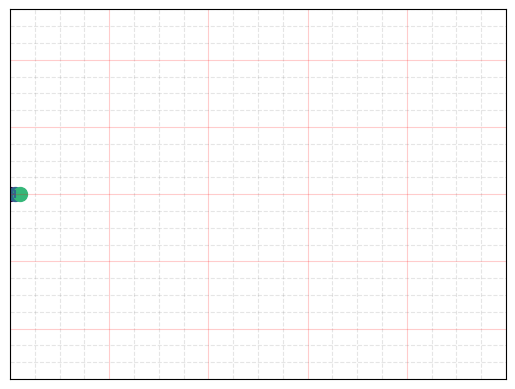

In [69]:
cross_section_plot(10000)

C:\Users\USER\AppData\Local\Temp\ipykernel_14720\393036961.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


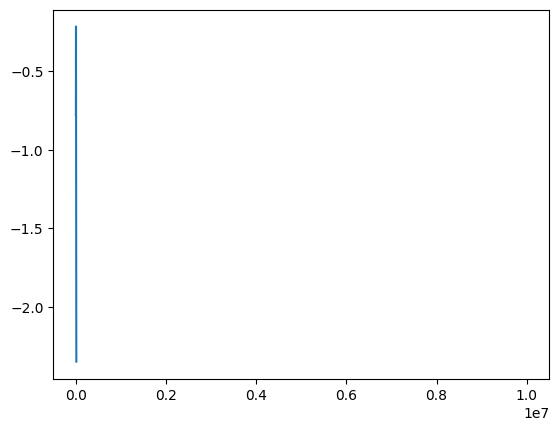

In [70]:
fig = plt.figure()
plt.plot(np.arange(len(ode_df.log_generalisation_error_1)), np.array(ode_df.log_generalisation_error_1))
plt.plot(100 * np.arange(len(network_df.log_generalisation_error_1)), np.array(network_df.log_generalisation_error_1), linestyle="dashed")
fig.show()